<a href="https://colab.research.google.com/github/Anjana2002/tensorflow-ai-journey/blob/main/Intro%20to%20tensorflow/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Computer Vision Example

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


labels:6

Image pixel array: 

[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 124 193 166 239 255 216 172 228 126  61   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159 108   0   0   0   0   0   0]
 [  0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0]
 [  0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0]
 [  0   0   0   0   0   0 171 135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0]
 [  0   0   0   0   0   4 171 138 126 120 117 118 102 122 145 111 120 122 120 152 154 155 170   0   0   0   0   0]
 [  0   0   0   0   0  31 170 129 138 125 113 106

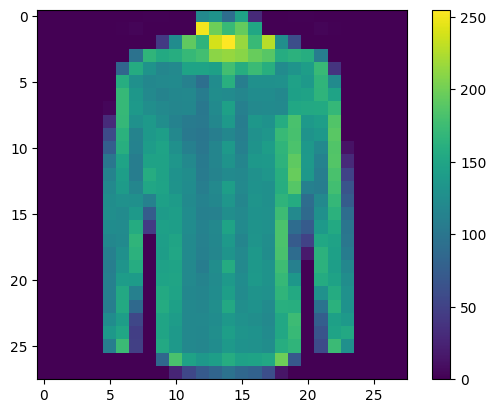

In [ ]:
index = 3000 #btwn 0 to 59999 here
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

print(f"labels:{training_labels[index]}")
print(f"\nImage pixel array: \n\n{training_images[index]}\n\n")

plt.imshow(training_images[index])
plt.colorbar()
plt.show()

In [ ]:
#Normalization
training_images = training_images/255.0
test_images = test_images/255.0

Sequential: That defines a sequence of layers in the neural network.

Flatten: images were a 28x28 pixel matrix, Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

ReLU effectively means:

if x > 0:

  return x


else:

  return 0


In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class.


In [ ]:
# classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # the number of neurons in the last layer should match the number of classes you are classifying for.
])


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7821 - loss: 0.6148
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8615 - loss: 0.3844
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8784 - loss: 0.3362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8851 - loss: 0.3105
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8926 - loss: 0.2887


In [ ]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.3806


[0.3834936320781708, 0.861299991607666]

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training:\n")
model.fit(training_images, training_labels, epochs=5)

print("\nEvaluating on test set:\n")
model.evaluate(test_images, test_labels)

print("\nPredicting using test set:\n")
predictions = model.predict(test_images)

print(f"\nTrue class for first image on test set: {test_labels[0]}\nProbability of each class:\n{predictions[0]}")

Training:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7681 - loss: 0.6715
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8551 - loss: 0.4062
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8683 - loss: 0.3568
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8780 - loss: 0.3371
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8833 - loss: 0.3211

Evaluating on test set:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8737 - loss: 0.3572

Predicting using test set:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

True class for first image on test set: 9
Probability of each class:
[3.64446919e-06 1.11330689e-06 1.51958347e-05 1.00807454e-04 1.46373477e-05 3.14648598e-02 2.95381524e-05 3.61653194e-02 1.74462120e-03 9.30460215e-01]
